# Test methods to add PCA coords to sequences (in utils)

## Load sequences

In [6]:
import os
import numpy as np
from utils import *

import platform

if platform.system() == "Darwin":  # macOS
    cwd = '/Users/marzioformica/Desktop/EPFL/Master/StageLBS/PCA_gen_AI/'
elif platform.system() == "Windows":
    cwd = 'C:\\Users\\otheruser\\Desktop\\EPFL\\Master\\StageLBS\\PCA_gen_AI\\'
else:
    # Default or Linux path
    cwd = '/home/otheruser/EPFL/Master/StageLBS/PCA_gen_AI/'

filename = os.path.join(cwd, 'CODE', 'DataAttentionDCA', 'jdoms', 'jdoms_bacteria_train2.fasta')

sequences = read_fasta_alignment(filename, 0.9)
print(sequences.shape)
print(f"Number of sequences: {len(sequences)}")
seqs_array = sequences.T
print(seqs_array.shape)

Total sequences read: 14502
Sequences after filtering: 14502
(63, 14502)
Number of sequences: 63
(14502, 63)


## Get PCA coords

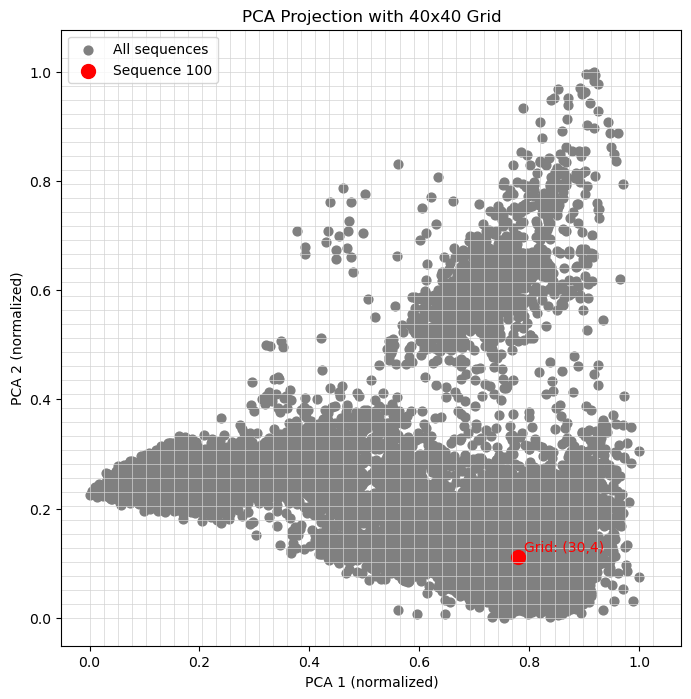

In [4]:
seqs_PCA_array = add_PCA_coords(seqs_array, N=40,max_pot=21,plot=True, highlight_index=100)

In [5]:
print(seqs_PCA_array.shape)

(14502, 65)
